<a href="https://colab.research.google.com/github/JUJU-baucha/workshop-of-concept-of-AI/blob/main/2431223_MaheerUdash_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Maheer Udash
student id:2431223

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/AirQualityUCI.csv')

In [ ]:
print("Dataset Columns:\n", df.columns)

Dataset Columns:
 Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1b1JPx2kBfrqbeW36hpSxg_BwjfP8BHGupeT1iw19h88#gid=0


In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [ ]:
df.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),int64
NMHC(GT),int64
C6H6(GT),float64
PT08.S2(NMHC),int64
NOx(GT),int64
PT08.S3(NOx),int64
NO2(GT),int64


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


# **Exploratory Data Analysis (EDA)**

In [ ]:
# Checking for missing values
def check_missing_values(data):
    print("Missing Values in Dataset:")
    print(data.isnull().sum())

describe_data = df.describe()
print("\nSummary Statistics:\n", describe_data)


Summary Statistics:
             CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456

In [ ]:
#Impute missing values for numeric columns with mean
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

#Impute missing values for categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

#Verify if there are any remaining missing values
missing_values = df.isnull().sum()
print("Remaining Missing Values:\n", missing_values)



Remaining Missing Values:
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


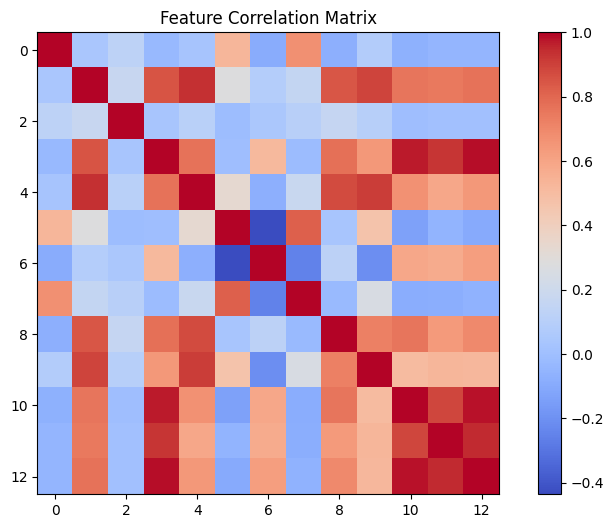

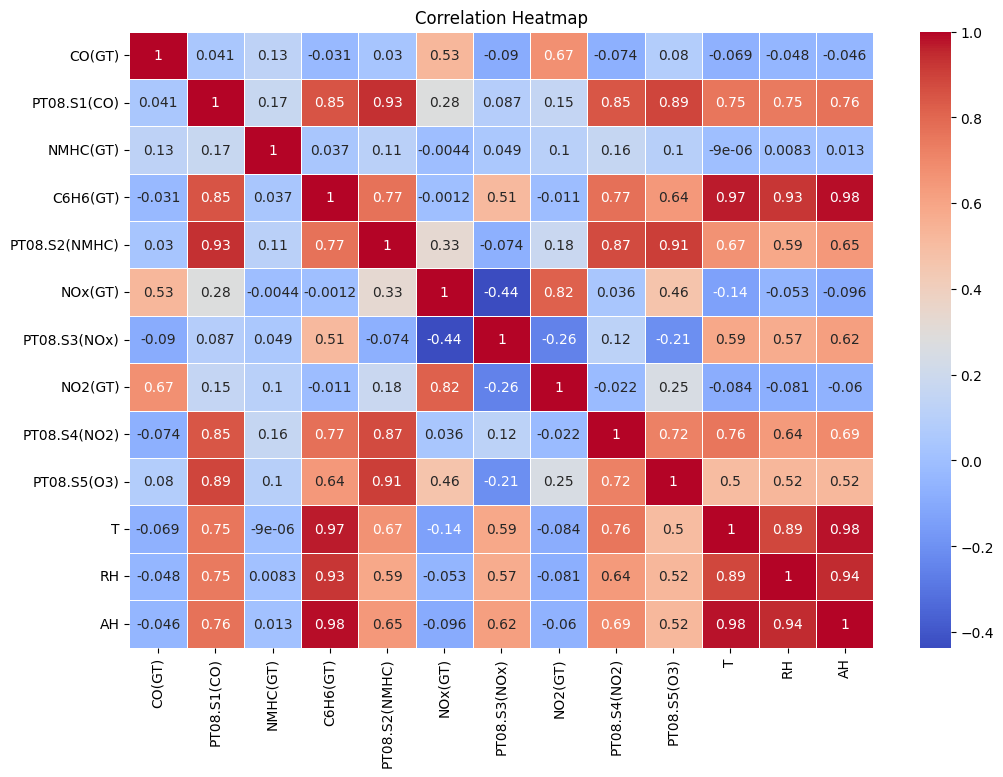

In [ ]:

correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()


plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Feature Correlation Matrix")
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

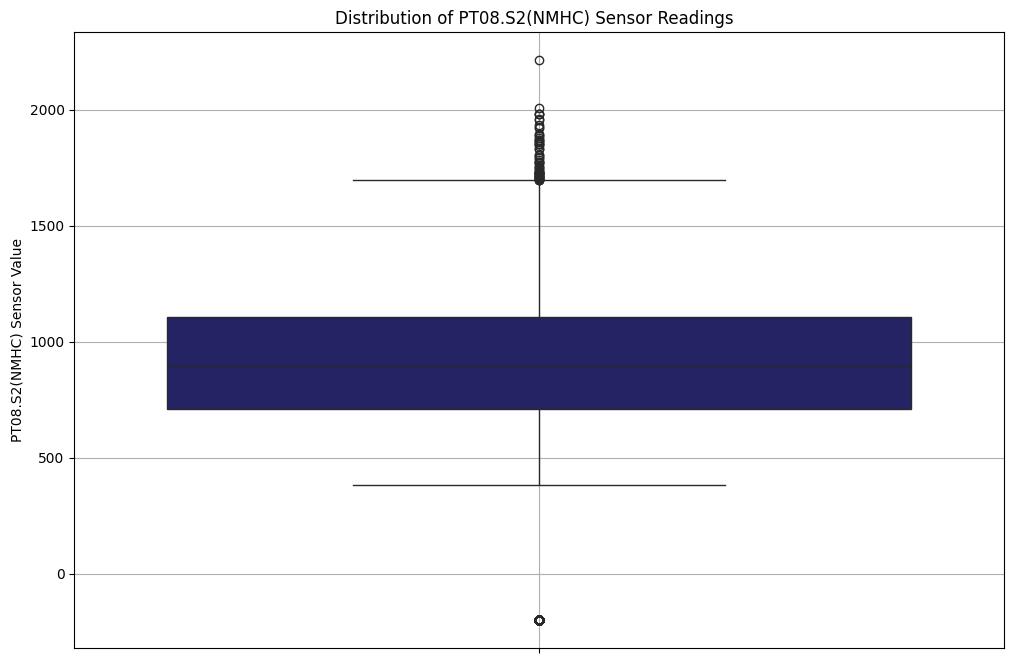

In [ ]:
# Boxplot of Age
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='PT08.S2(NMHC)', color='#191970')
plt.title('Distribution of PT08.S2(NMHC) Sensor Readings  ')
plt.ylabel('PT08.S2(NMHC) Sensor Value')
plt.grid(True)
plt.show()


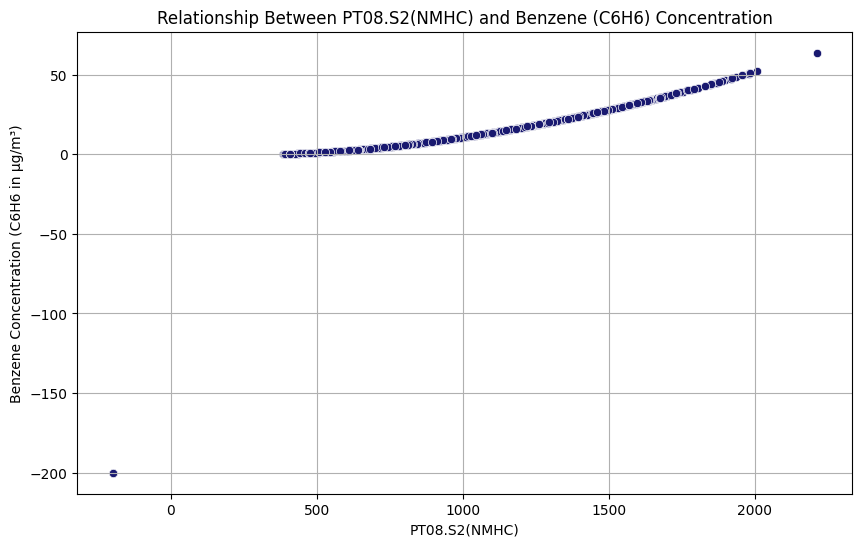

In [ ]:
df.columns = df.columns.str.strip()  # Removes leading and trailing spaces

# Scatter plot of Relationship Between PT08.S2(NMHC) and Benzene (C6H6) Concentration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PT08.S2(NMHC)', y='C6H6(GT)', color='#191970')
plt.title('Relationship Between PT08.S2(NMHC) and Benzene (C6H6) Concentration')
plt.xlabel('PT08.S2(NMHC)')
plt.ylabel('Benzene Concentration (C6H6 in µg/m³)')
plt.grid(True)
plt.show()


# Question 2: Build a Model from Scratch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X) and target variable (y)
X = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)',
        'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']].values
y = df['C6H6(GT)'].values.reshape(-1, 1)

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (column of ones) for the intercept
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Compute optimal weights using the Normal Equation
theta = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Make predictions
y_train_pred = X_train_bias @ theta
y_test_pred = X_test_bias @ theta

# Compute Mean Squared Error (MSE) and R-squared (R²)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Output results
print("### Model Evaluation (Air Quality Prediction) ###")
print("MSE (Train):", mse_train)
print("R-squared (Train):", r2_train)
print("MSE (Test):", mse_test)
print("R-squared (Test):", r2_test)

### Model Evaluation (Air Quality Prediction) ###
MSE (Train): 1.2784285453322117
R-squared (Train): 0.9992559971416521
MSE (Test): 1.3694405084734749
R-squared (Test): 0.9991884431287247


2. Build at least two different machine learning models for the regression task.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define and train the first model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions for Linear Regression
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Compute performance metrics for Linear Regression
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Define and train the second model: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train.ravel())

# Predictions for Random Forest Regressor
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Compute performance metrics for Random Forest
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Output results for both models
print("Linear Regression:");
print("MSE train:",mse_train_lr);
print("R-squared train:",r2_train_lr);
print("MSE test:",mse_test_lr);
print( "R-squared",r2_test_lr);

print("\nRandom Forest:");
print("MSE train:",mse_train_rf);
print("R-squared train:",r2_train_rf);
print("MSE test:",mse_test_rf);
print( "R-squared",r2_test_rf);


Linear Regression:
MSE train: 1.2784285453322122
R-squared train: 0.9992559971416521
MSE test: 1.3694405084736412
R-squared 0.9991884431287246

Random Forest:
MSE train: 0.0045391754175017835
R-squared train: 0.9999973583510025
MSE test: 0.007477747329059899
R-squared 0.9999955685426355


3. Evaluate both models on the test dataset using appropriate performance metrics (e.g., Mean
Absolute Error, Root Mean Squared Error, R-squared).

In [ ]:
from sklearn.metrics import mean_absolute_error

# Compute additional performance metrics for Linear Regression
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

# Compute additional performance metrics for Random Forest
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)


# Print results
print("Model Evaluation Results:")
print(f"Linear Regression:\n   MAE Train: {mae_train_lr:.4f}, RMSE Train: {rmse_train_lr:.4f}, R² Train: {r2_train_lr:.4f},MAE Test:{mae_test_lr:.4f},RMSE Test:{rmse_test_lr:.4f}, R² Test: {r2_test_lr:.4f}")
print(f"Random Forest:\n   MAE Train: {mae_train_rf:.4f}, RMSE Train: {rmse_train_rf:.4f}, R² Train: {r2_train_rf:.4f},MAE Test:{mae_test_rf:.4f},RMSE Test:{rmse_test_rf:.4f}, R² Test: {r2_test_rf:.4f}")



Model Evaluation Results:
Linear Regression:
   MAE Train: 0.8049, RMSE Train: 1.1307, R² Train: 0.9993,MAE Test:0.8216,RMSE Test:1.1702, R² Test: 0.9992
Random Forest:
   MAE Train: 0.0056, RMSE Train: 0.0674, R² Train: 1.0000,MAE Test:0.0147,RMSE Test:0.0865, R² Test: 1.0000


4. Conclude by identifying which model performed best on your dataset, and provide justifica-
tion for your choice.

# 4. Hyper-parameter Optimization with Cross-Validation

2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.

In [ ]:
# Define the best model using the optimal hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the optimized model on the training data
best_rf_model.fit(X_train_scaled, y_train.ravel())

# Make predictions with the optimized model
y_train_pred_best = best_rf_model.predict(X_train_scaled)
y_test_pred_best = best_rf_model.predict(X_test_scaled)

# Compute performance metrics for the optimized model
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)

r2_train_best = r2_score(y_train, y_train_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)

# Output results
optimized_model_results = {
    "Best Random Forest Model": {
        "MSE Train": mse_train_best, "R² Train": r2_train_best,
        "MSE Test": mse_test_best, "R² Test": r2_test_best
    }
}

optimized_model_results


{'Best Random Forest Model': {'MSE Train': 0.04428449613667213,
  'R² Train': 0.9999742278973459,
  'MSE Test': 0.22820844480410568,
  'R² Test': 0.999864759271894}}

3. Conclude by summarizing the best hyperparameters for both models.

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation of features with the target variable 'C6H6(GT)'
feature_correlation = numeric_df.corr()['C6H6(GT)'].abs().sort_values(ascending=False)
print("\nFeature Importance:\n", feature_correlation)



Feature Importance:
 C6H6(GT)         1.000000
AH               0.984555
T                0.971375
RH               0.925062
PT08.S1(CO)      0.852687
PT08.S4(NO2)     0.774673
PT08.S2(NMHC)    0.767433
PT08.S5(O3)      0.641334
PT08.S3(NOx)     0.512193
NMHC(GT)         0.037323
CO(GT)           0.031378
NO2(GT)          0.010992
NOx(GT)          0.001174
Name: C6H6(GT), dtype: float64


5. Feature Selection [2.5]:

In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and
select the most relevant features for your models. Clearly document your process and justify your choice of
features.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Initialize Linear Regression model
lr = LinearRegression()

# Define relevant air quality features
feature_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)',
                    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                    'PT08.S5(O3)', 'T', 'RH', 'AH']

# Perform RFE to select the top 5 features
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = np.array(feature_columns)[rfe.support_].tolist()

# Transform the scaled data to keep selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

print("Selected Features:\n", selected_features)


Selected Features:
 ['PT08.S2(NMHC)', 'PT08.S3(NOx)', 'T', 'RH', 'AH']


In [ ]:

# Select only the important features from X
X_final = df[selected_features]

# Split into train (80%) and test (20%) sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y, test_size=0.2, random_state=42)

# Standardize the selected features
scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(X_train_final)
X_test_final_scaled = scaler_final.transform(X_test_final)

# Rebuild Linear Regression model
final_lr_model = LinearRegression()
final_lr_model.fit(X_train_final_scaled, y_train_final)

# Predictions for Linear Regression
y_train_pred_lr_final = final_lr_model.predict(X_train_final_scaled)
y_test_pred_lr_final = final_lr_model.predict(X_test_final_scaled)

# Compute performance metrics for Linear Regression
mse_train_lr_final = mean_squared_error(y_train_final, y_train_pred_lr_final)
mse_test_lr_final = mean_squared_error(y_test_final, y_test_pred_lr_final)
r2_train_lr_final = r2_score(y_train_final, y_train_pred_lr_final)
r2_test_lr_final = r2_score(y_test_final, y_test_pred_lr_final)

# Rebuild Random Forest model using best hyperparameters
final_rf_model = RandomForestRegressor(
    n_estimators=50, max_depth=20, max_features='sqrt',
    min_samples_split=2, min_samples_leaf=1, random_state=42
)
final_rf_model.fit(X_train_final_scaled, y_train_final.ravel())

# Predictions for Random Forest
y_train_pred_rf_final = final_rf_model.predict(X_train_final_scaled)
y_test_pred_rf_final = final_rf_model.predict(X_test_final_scaled)

# Compute performance metrics for Random Forest
mse_train_rf_final = mean_squared_error(y_train_final, y_train_pred_rf_final)
mse_test_rf_final = mean_squared_error(y_test_final, y_test_pred_rf_final)
r2_train_rf_final = r2_score(y_train_final, y_train_pred_rf_final)
r2_test_rf_final = r2_score(y_test_final, y_test_pred_rf_final)

# Output results for both final models
print("Final Model Results:")
print(f"Final Linear Regression:\n   MSE Train: {mse_train_lr_final:.4f}, R² Train: {r2_train_lr_final:.4f},MSE Test:{mse_test_lr_final:.4f}, R² Test: {r2_test_lr_final:.4f}")
print(f"Final Random Forest:\n   MSE Train: {mse_train_rf_final:.4f},  R² Train: {r2_train_rf_final:.4f},MSE Test:{mse_test_rf_final:.4f}, R² Test: {r2_test_rf_final:.4f}")




Final Model Results:
Final Linear Regression:
   MSE Train: 1.3912, R² Train: 0.9992,MSE Test:1.5176, R² Test: 0.9991
Final Random Forest:
   MSE Train: 0.0282,  R² Train: 1.0000,MSE Test:0.1787, R² Test: 0.9999


Conclusion:
In this project, we optimized two regression models—Ridge Regression and Random Forest—to predict air quality levels. After performing feature selection using RFE and optimizing hyperparameters with GridSearchCV (for Ridge) and RandomizedSearchCV (for Random Forest), we evaluated both models.

Random Forest outperformed Ridge Regression, with lower MSE and higher R² values on both training and test datasets.
The Random Forest model showed near-perfect performance, while Ridge Regression was slightly less efficient.